<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/Correlation_Regression_Non_Parametrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spotify_sample = pd.read_csv('spotify_sample_ah.csv')
spotify_sample.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,2IVsRhKrx8hlQBOWy4qebo,Ricky Montgomery,Montgomery Ricky,Mr Loverman,79,216880,False,0.639,0.526,0,-6.697,1,0.0256,0.24500,0.000024,0.2500,0.488,130.033,3,indie-pop
1,5Odq8ohlgIbQKMZivbWkEo,Charlie Puth;Jung Kook;BTS,CHARLIE,Left and Right (Feat. Jung Kook of BTS),75,154486,False,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,4,dance
2,4jbmgIyjGoXjY01XxatOx6,Katy Perry;Juicy J,PRISM,Dark Horse,78,215672,False,0.647,0.585,6,-6.123,1,0.0512,0.00314,0.000000,0.1650,0.353,131.934,4,dance
3,37EJtTS7jT5WUyXGZzrwnI,Everclear,Sparkle And Fade,Santa Monica,71,191506,False,0.491,0.942,7,-5.333,1,0.1320,0.15600,0.000000,0.3670,0.387,100.446,4,grunge
4,1roCmBlcpV7LzsmB7pmCyt,Alec Benjamin;Alessia Cara,Let Me Down Slowly (feat. Alessia Cara),Let Me Down Slowly (feat. Alessia Cara),71,169174,False,0.655,0.569,1,-5.018,0,0.0349,0.71600,0.000007,0.1350,0.440,150.267,4,electro


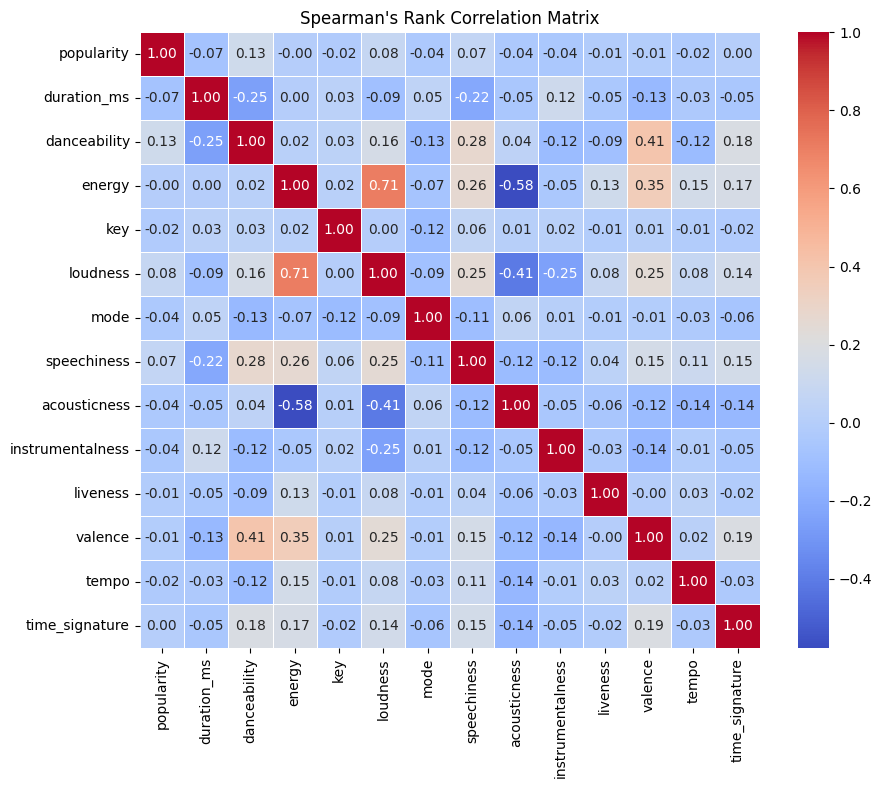

In [4]:
from sklearn.linear_model import TheilSenRegressor

#Filter numeric columns
spotify_sample_numeric = spotify_sample.select_dtypes(include=[np.number])
#Calculate Spearman's rank correlation matrix
spearman_corr = spotify_sample_numeric.corr(method='spearman')

#Heatmap for spearman's rank correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f")
plt.title('Spearman\'s Rank Correlation Matrix')
plt.show()

                  popularity  duration_ms  danceability    energy       key  \
popularity          1.000000    -0.050029      0.089937 -0.001031 -0.012721   
duration_ms        -0.050029     1.000000     -0.171749  0.000184  0.019532   
danceability        0.089937    -0.171749      1.000000  0.007001  0.022862   
energy             -0.001031     0.000184      0.007001  1.000000  0.010588   
key                -0.012721     0.019532      0.022862  0.010588  1.000000   
loudness            0.055104    -0.062390      0.108739  0.516982  0.000874   
mode               -0.031218     0.039405     -0.107039 -0.054367 -0.098538   
speechiness         0.045994    -0.148979      0.184560  0.177247  0.041750   
acousticness       -0.027772    -0.032090      0.028822 -0.413812  0.007737   
instrumentalness   -0.030959     0.089508     -0.083348 -0.032286  0.012049   
liveness           -0.010382    -0.031026     -0.062175  0.083805 -0.006520   
valence            -0.005367    -0.087626      0.277

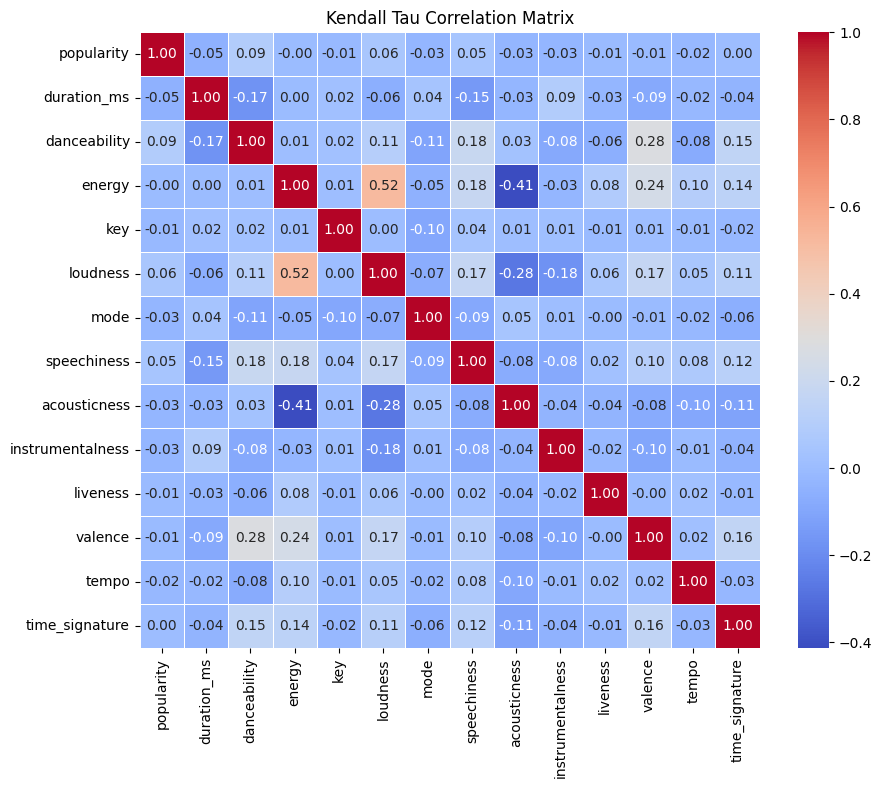

In [8]:
#Calculate Kendal Tau correlation Matrix
kendal_corr = spotify_sample_numeric.corr(method='kendall')
print(kendal_corr)
#Heatmap for Kendal Tau correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kendal_corr, cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f")
plt.title('Kendall Tau Correlation Matrix')
plt.show()

In [7]:
#Theil-Sen robust regression for 'danceability' and 'energy' predicting 'popularity'

X = spotify_sample_numeric[['danceability', 'energy']]
y = spotify_sample_numeric['popularity']

# Create and fit the TheilSenRegressor model
model = TheilSenRegressor()
model.fit(X, y)
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  73.28920454412726
Coefficient:  [2.79257858 0.31619448]
